# Visualizing Earnings Based On College Majors

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

Using visualizations, I'll explore questions from the dataset like:

- Do students in more popular majors make more money?

- How many majors are predominantly male? Predominantly female?

- Which category of majors have the most students?


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [9]:
#remove rows containing missing values
recent_grads = recent_grads.dropna()

In [10]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Only one row contained missing values and it was dropped

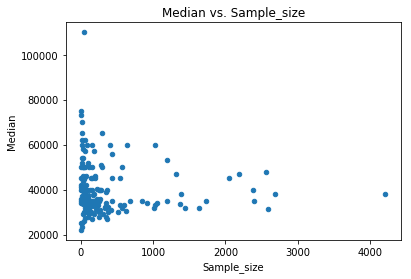

In [11]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

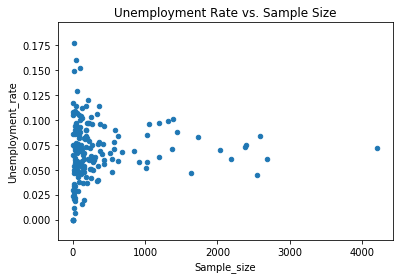

In [12]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. Sample Size')

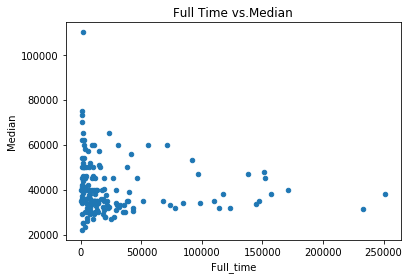

In [13]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs.Median')

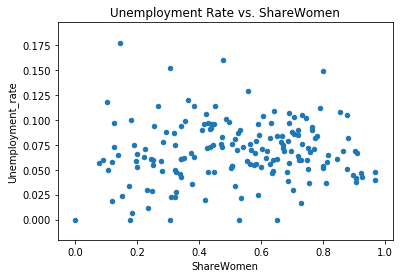

In [14]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. ShareWomen')

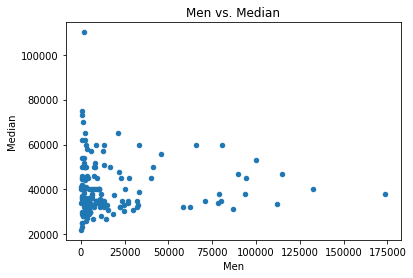

In [15]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

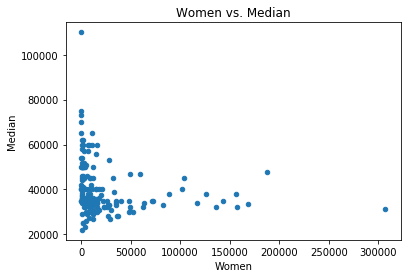

In [16]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

In [17]:
recent_grads['Total'].median()

15104.0

## Do students that majored in subjects that were majority female make more money?

In [18]:
majority_female_subjects = recent_grads[recent_grads['ShareWomen']>=0.60]
minority_female_subjects = recent_grads[recent_grads['ShareWomen'] < 0.60]

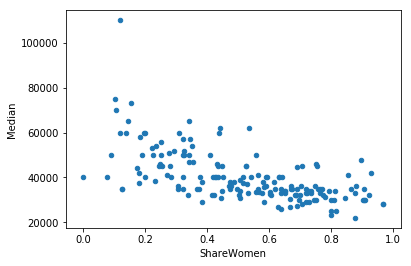

In [19]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter')

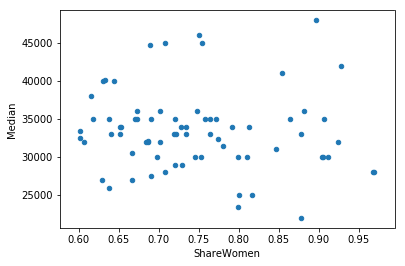

In [20]:
majority_female_subjects.plot(x='ShareWomen',y='Median',kind='scatter')

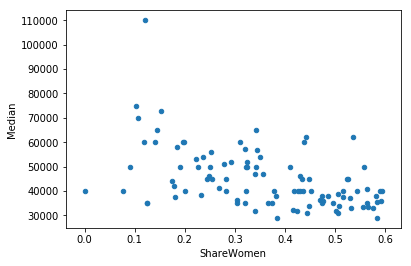

In [21]:
minority_female_subjects.plot(x='ShareWomen',y='Median',kind='scatter')

Students that major in courses where the majority of students were female made less than their peers 

## Is there any link between the number of full-time employees and median salary?

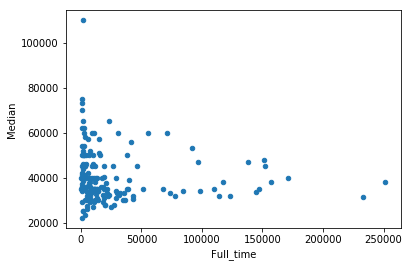

In [22]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter')

There is a negative correlation among the variables. The less full time employees a major has, the higher their median salary.

##  Do students in popular majors make more money?

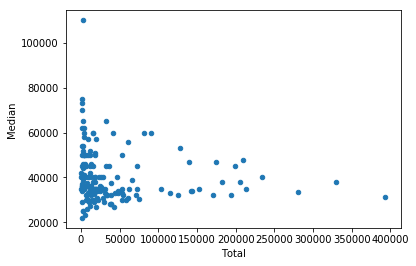

In [23]:
recent_grads.plot(x='Total',y='Median',kind='scatter')

Students in less popular majors make more money than their peers. To explore futher, group the data by their mean


In [24]:
popular_majors = recent_grads[recent_grads['Total'] >= recent_grads['Total'].mean()]
unpopular_majors = recent_grads[recent_grads['Total'] < recent_grads['Total'].mean()]

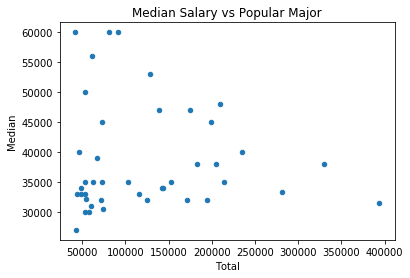

In [25]:
popular_majors.plot(x='Total',y='Median',kind='scatter',title='Median Salary vs Popular Major')

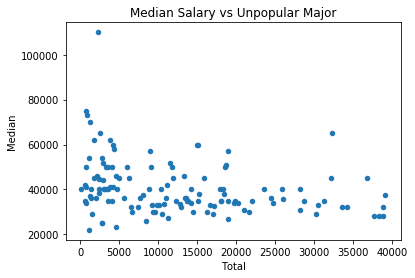

In [26]:
unpopular_majors.plot(x='Total',y='Median',kind='scatter',title='Median Salary vs Unpopular Major')

Employees of unpopular majors make more than peers, almost 20000 more.

# Distributions of Values

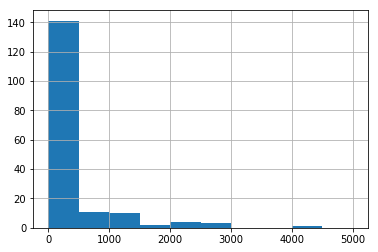

In [27]:
recent_grads['Sample_size'].hist(bins=10,range=(0,5000))

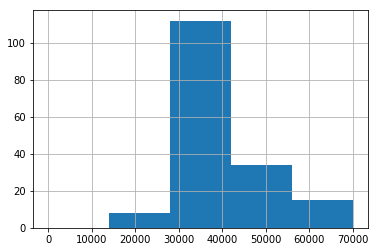

In [28]:
recent_grads['Median'].hist(bins=5,range=(0,70000))

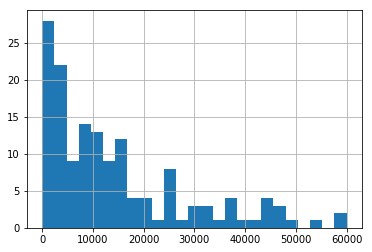

In [29]:
recent_grads['Employed'].hist(bins=25,range=(0,60000))

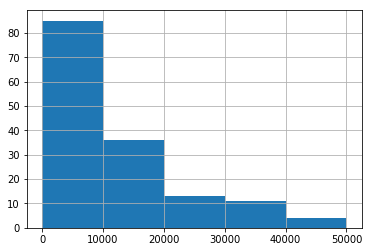

In [30]:
recent_grads['Full_time'].hist(bins=5,range=(0,50000))

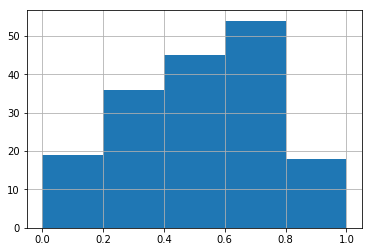

In [31]:
recent_grads['ShareWomen'].hist(bins=5,range=(0,1))

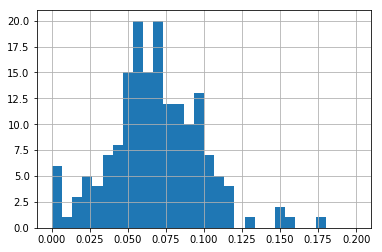

In [32]:
recent_grads['Unemployment_rate'].hist(bins=30,range=(0,0.2))

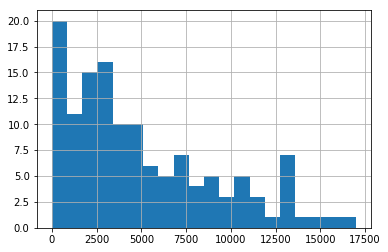

In [33]:
recent_grads['Men'].hist(bins=20,range=(0,17000))

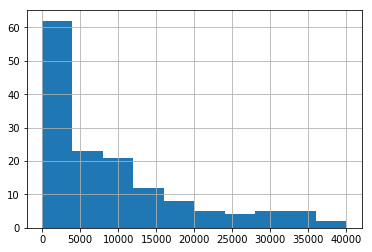

In [34]:
recent_grads['Women'].hist(bins=10,range=(0,40000))

The most common median salary range is between 30000 and 40000

About 60% of all majors are predominantly male



In [35]:
#import scatter matrix
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c833c8>,
      dtype=object)

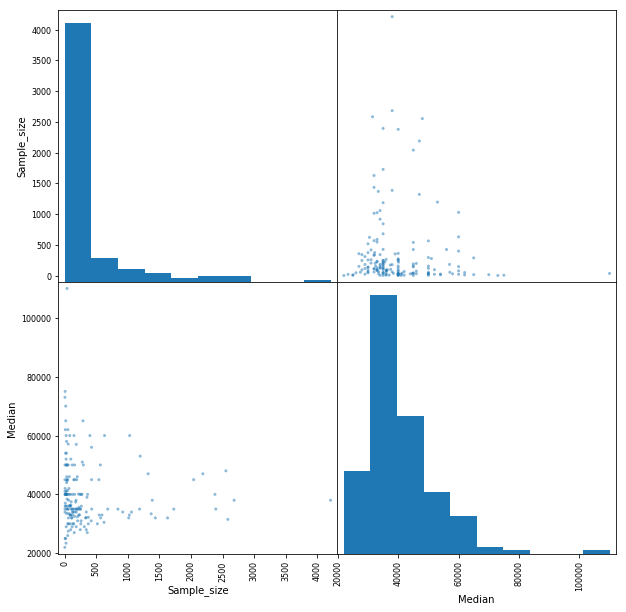

In [36]:
#2 x 2 scattermatrix plot

scatter_matrix(recent_grads[['Sample_size', 'Median']],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11905f630>,
      dtype=object)

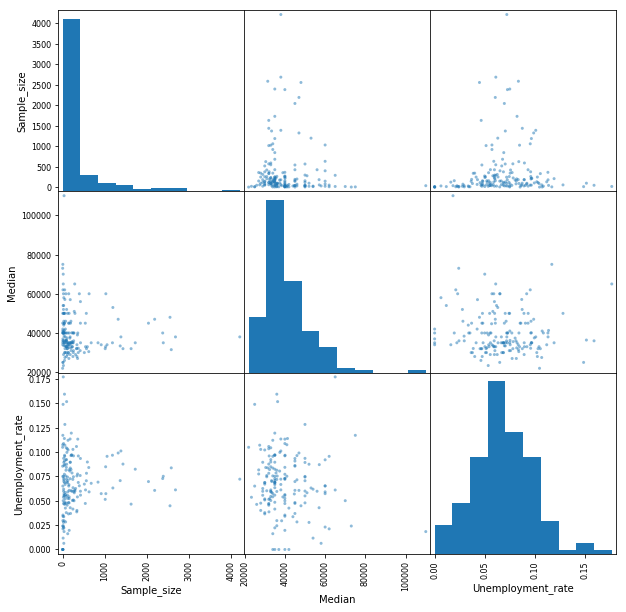

In [37]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']],figsize=(10,10))

## Compare percentages of women from the first 10 rows and last 10 rows

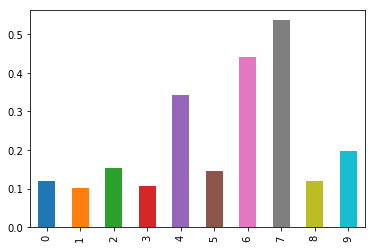

In [38]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

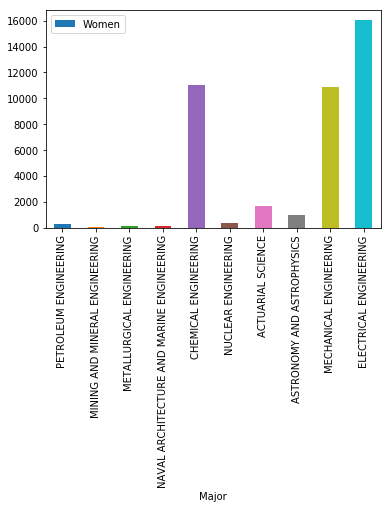

In [39]:
recent_grads[:10].plot.bar(x='Major',y='Women')

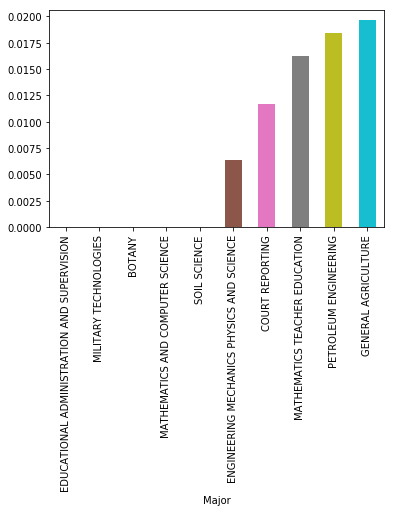

In [40]:
unemployement_sorted = recent_grads[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate')

unemployement_sorted[:10].plot.bar(x='Major',y='Unemployment_rate',legend=False)

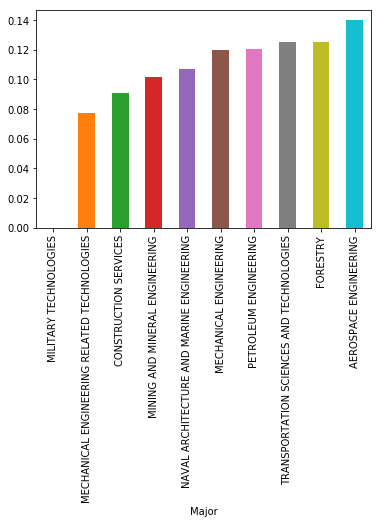

In [41]:
sharewomen_sorted = recent_grads[['Major','ShareWomen']].sort_values(by='ShareWomen',ascending=True)

sharewomen_sorted[:10].plot.bar(x='Major',y='ShareWomen',legend=False)

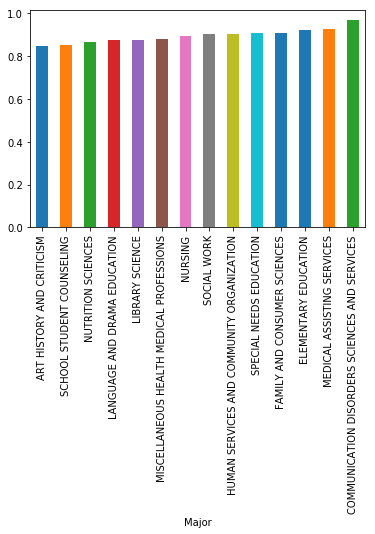

In [42]:
sharewomen_sorted1 = recent_grads[['Major','ShareWomen']].sort_values(by='ShareWomen',ascending=True)
sharewomen_sorted1[-15:-1].plot.bar(x='Major',y='ShareWomen',legend=False)

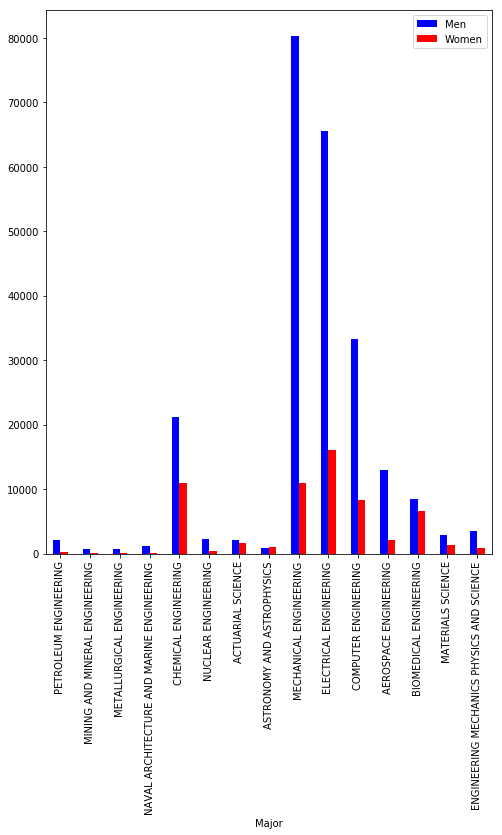

In [50]:
#grouped bar chart to compare number of men with number of women in each categories of majors

major_men_women = recent_grads[['Major','Men','Women']]

major_men_women[:15].plot.bar(x='Major',figsize=(8,10),color=['blue','red'])

In [ ]:
#box plot to explore the didtribution of median salaries and unemployment rate

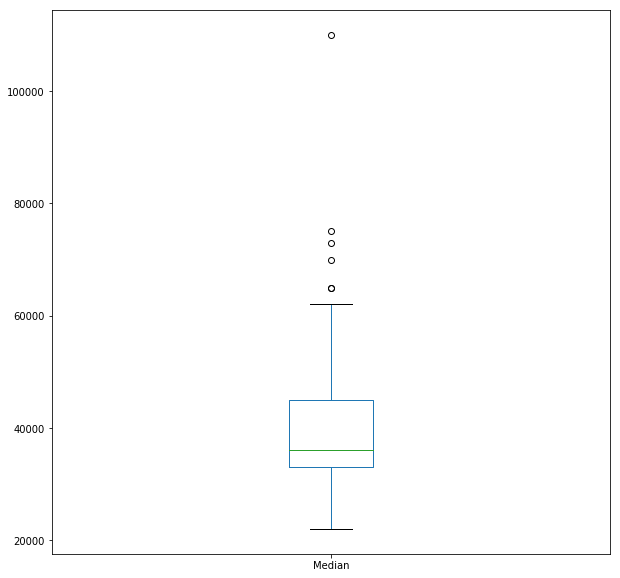

In [56]:
recent_grads['Median'].plot.box(figsize=(10,10))

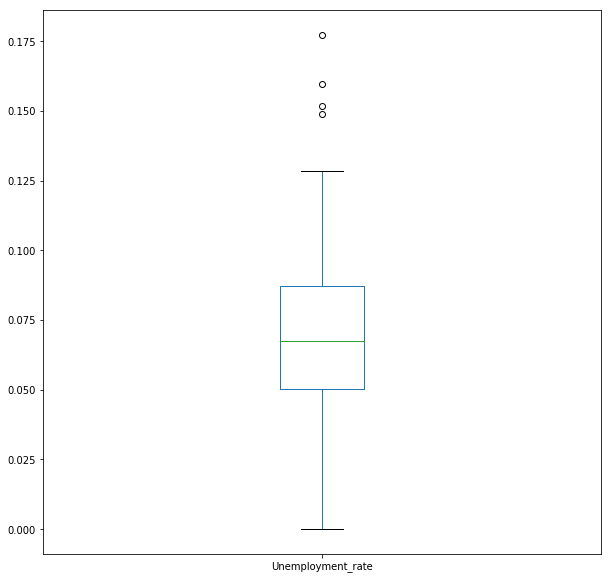

In [57]:
recent_grads['Unemployment_rate'].plot.box(figsize=(10,10))

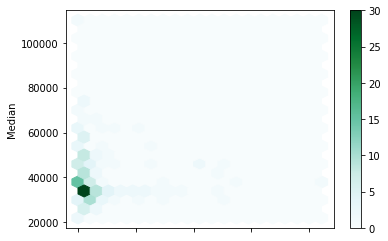

In [59]:
recent_grads.plot.hexbin(x='Sample_size', y='Median',gridsize=20)

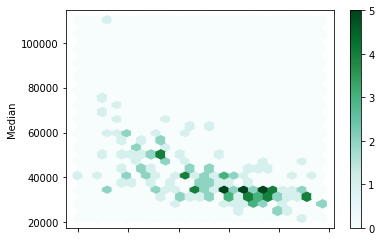

In [60]:
recent_grads.plot.hexbin(x='ShareWomen',y='Median',gridsize=25)

# Findings

- Employees that majored in subjects that were majority female make less money than their counterparts

- The less full time employees a major has, the higher their median salary .

- The most common median salary range is between 30000 and 40000

- About 60% of all majors are predominantly male

- Employees that majored in unpopular majors make almost 20 times more than their counterparts

- Women are more prevalent in social science majors than in STEM majors
